# 1.简单chat_bot

## 1.1 定义状态图StateGraph

In [2]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# 定义状态类型，继承自 TypedDict，并使用 add_messages 函数将消息追加到现有列表
class State(TypedDict):
    messages: Annotated[list, add_messages]

# 创建一个状态图对象，传入状态定义
graph_builder = StateGraph(State)

In [3]:
print(graph_builder)

## 1.2 添加聊天节点

In [4]:
from langchain_openai import ChatOpenAI

# 初始化一个 GPT-4o-mini 模型
chat_model = ChatOpenAI(model="gpt-4o-mini")

# 定义聊天机器人的节点函数，接收当前状态并返回更新的消息列表
def chatbot(state: State):
    return {"messages": [chat_model.invoke(state["messages"])]}

# 第一个参数是唯一的节点名称，第二个参数是每次节点被调用时的函数或对象
graph_builder.add_node("chatbot", chatbot)

## 1.3 定义流程图

In [5]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

## 1.4 编译绘图

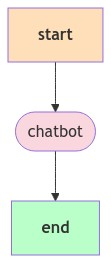

In [6]:
# 编译状态图并生成可执行图对象
graph = graph_builder.compile()

# 你可以使用 get_graph 方法来可视化图，并结合 draw 方法（如 draw_ascii 或 draw_png）
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

## 编译调用

In [ ]:
# 开始一个简单的聊天循环
while True:
    # 获取用户输入
    user_input = input("User: ")
    
    # 可以随时通过输入 "quit"、"exit" 或 "q" 退出聊天循环
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")  # 打印告别信息
        break  # 结束循环，退出聊天

    # 将每次用户输入的内容传递给 graph.stream，用于聊天机器人状态处理
    inpt_str = ("user", user_input)
    msg = {"messages": inpt_str}
    print(f"inpt_str:{inpt_str},type:type{type(inpt_str)}")
    print(f"msg:{msg},type:{type(msg)}")
    # "messages": ("user", user_input) 表示传递的消息是用户输入的内容
    for event in graph.stream(msg):
        
        # 遍历每个事件的值
        for value in event.values():
            # 打印输出 chatbot 生成的最新消息
            print("Assistant:", value["messages"][-1].content)

inpt_str:('user', 'Nihao'),type:type<class 'tuple'>
msg:{'messages': ('user', 'Nihao')},type:<class 'dict'>
